In [167]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
data_directory = './data/'
data_dir_list = os.listdir(data_directory)
expr_spaces_begin_end = re.compile(r'(^\ +)|(\ +$)', re.M)


In [154]:
def convert_to_csv(filename, sep=',', format='csv', encoding='cyrillic'):
    with open(filename, 'r', encoding=encoding) as f1:
        with open(f1.name.replace("TXT", format), 'w') as f2:
            [f1.readline() for i in range(6)]
            print(f"t{sep}U{sep}U{sep}Pij{sep}Pg{sep}Pgt{sep}delta".expandtabs(1), file=f2)
            buf = f1.read()
            buf = expr.sub('', buf)
            buf = re.sub('\ +', ',', buf)
            print(buf, file=f2)
    print(f'Converted {f1.name} -> {f2.name}')


In [155]:
# os.chdir('../..')
os.getcwd()

'/home/poligon/master_degree'

In [200]:
def conver_all_files_from_directory(data_directory):
    os.chdir(data_directory)
    for directory in data_dir_list:
        os.chdir(directory)
        print('Converting files in', os.getcwd())
        for filename in os.listdir(os.curdir):
            if re.match(r'(.*TXT)|(.*txt)', filename):
                convert_to_csv(filename)
        os.chdir('../')
    os.chdir('../')

In [214]:
ex = np.array((1,1,1))
ex[0] = (pd.read_csv(data_directory + data_dir_list[0] + '/1.csv', ))
ex

ValueError: setting an array element with a sequence.

In [197]:
ex_norm = (ex - ex.mean())/ex.std()
ex_norm.sample(5)

,t,U,U.1,Pij,Pg,Pgt,delta
89,-0.191328,0.340946,0.232336,0.649817,0.531709,-0.997509,-0.254220
127,0.463699,-0.481787,-0.530954,0.643571,1.051943,-0.997509,0.518225
104,0.067235,0.004775,-0.079919,0.711888,0.915092,-0.997509,0.068372
33,-1.156632,1.265416,1.203795,-0.089961,-2.020157,-0.997509,-1.231369
39,-1.053206,1.216759,1.169100,-0.027890,-1.826956,-0.997509,-1.177110


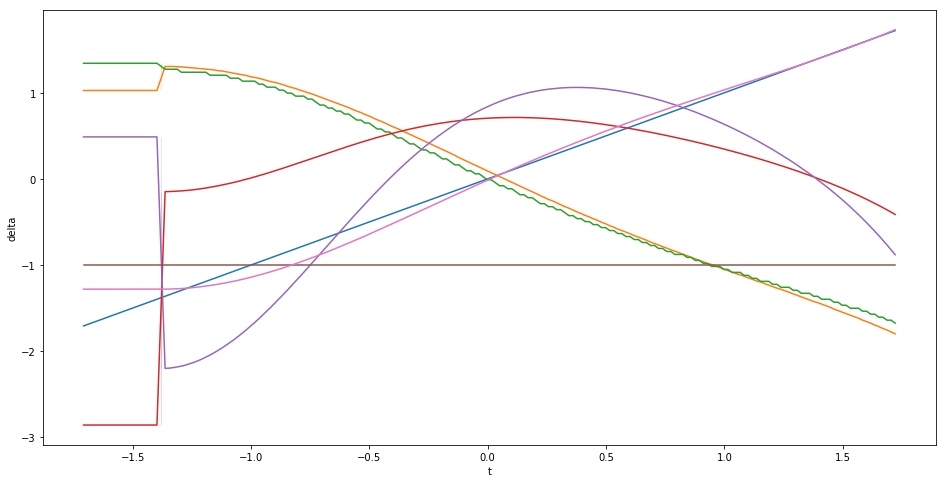

In [199]:
plt.figure(figsize=(16,8))
for feature in ex_norm:
    sns.lineplot(x='t', y=feature, data=ex_norm, legend='full')
